In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('../data/retail_case_data.csv')

In [3]:
# exploring the Age column 
print('min income:', min(df['Income'].unique()))
print('max income:', max(df['Income'].unique()))
print('amplitude of income:', max(df['Income'].unique()) - min(df['Income'].unique()))
print('median income:', df['Income'].median())
print('average income:', df['Income'].mean())

selec_cols = ['Income', 'Response']
new_df = df[selec_cols]

min income: 1730.0
max income: 666666.0
amplitude of income: 664936.0
median income: 51381.5
average income: 52247.25135379061


In [4]:
bins = [
    1000,
    10000,
    20000,
    30000,
    40000,
    50000,
    60000,
    70000,
    80000,
    90000,
    100000,
    300000,
    500000,
    700000
]


new_df['Income_Group'] = pd.cut(new_df['Income'], bins)

true_frequeny_by_income_groups = new_df.groupby('Income_Group')['Response'].mean()

/tmp/ipykernel_115847/1371775478.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Income_Group'] = pd.cut(new_df['Income'], bins)
/tmp/ipykernel_115847/1371775478.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  true_frequeny_by_income_groups = new_df.groupby('Income_Group')['Response'].mean()


## Plotting the chart

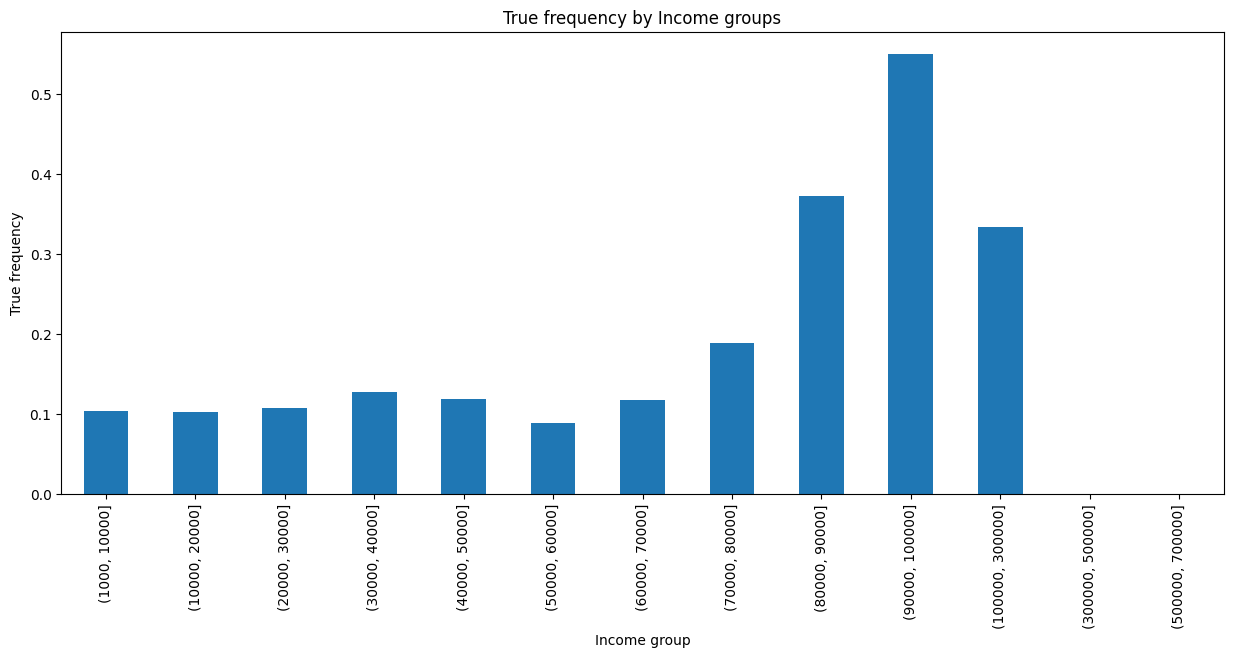

In [5]:
import matplotlib.pyplot as plt

true_frequeny_by_income_groups.plot(kind='bar', figsize=(15,6))
plt.title('True frequency by Income groups')
plt.xlabel('Income group')
plt.ylabel('True frequency')

plt.show()

### Applying T-Test

In [21]:
from scipy.stats import ttest_ind

buyers = new_df[new_df['Response'] == 1]['Income'].dropna()
non_buyers = new_df[new_df['Response'] == 0]['Income'].dropna()

# Realizar o teste t
t_stat, p_valor = ttest_ind(buyers, non_buyers)

print("t statics:", t_stat)
print("p value:", p_valor)
print("p value (string):", '{:.20f}'.format(p_valor))


t statics: 6.316420548976486
p value: 3.2255685843409974e-10
p value (string): 0.00000000032255685843


## Conclusion

With the t-statics being 6.316420 and an extreme low p-value, we can conclude that there is a significant difference between the income average of those two groups, buyers and non-buyers.
Thus, we can reject the null hypothesis leading us to believe that, the higher the customer's income is, the higher the probability to him accept the offer.